In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np

%matplotlib inline

In [2]:
# Read in dataframe from csv named "8803-MDS User Study.csv"
df = pd.read_csv('./8803-MDS User Study.csv')

In [3]:
df.head()

,Timestamp,The figure below depicts a plot of weekly USA product supplied of gasoline.\nWhich of the following plots best represents a smoothened version of the figure below while preserving important information too? Click on the link to see the plots: gasoline1.pdf\nType the numbers of the top 3 chosen plots (Comma Separated).,The figure below depicts a plot of the daily maximum temperature over JFK airport.\nWhich of the following plots best represents a smoothened version of the figure below while preserving important information too? Click on the link to see the plots: climate_jfk_tmax.pdf\nType the numbers of the top 3 chosen plots (Comma Separated).,The figure below depicts a plot of eeg signal sampled at 2500 Hz.\nWhich of the following plots best represents a smoothened version of the figure below while preserving important information too? Click on the link to see the plots: eeg_chan10_2500.pdf\nType the numbers of the top 3 chosen plots (Comma Separated).,The figure below depicts a plot of the weekly homicides in Chicago.\nWhich of the following plots best represents a smoothened version of the figure below while preserving important information too? Click on the link to see the plots: chi_homicide_weekly.pdf\nType the numbers of the top 3 chosen plots (Comma Separated).,The figure below depicts a plot of monthly beer sales in Austria.\nWhich of the following plots best represents a smoothened version of the figure below while preserving important information too? Click on the link to see the plots: monthly_beer_austria.pdf\nType the numbers of the chosen plots (Comma Separated).,The figure below depicts a plot of daily maximum temperature over LAX airport.\nWhich of the following plots best represents a smoothened version of the figure below while preserving important information too? Click on the link to see the plots: climate_lax_awnd.pdf\nType the numbers of the top 3 chosen plots (Comma Separated).,The figure below depicts a plot of monthly USA product supplied of gasoline.\nWhich of the following plots best represents a smoothened version of the figure below while preserving important information too? Click on the link to see the plots: gasoline2.pdf\nType the numbers of the top 3 chosen plots (Comma Separated).,The figure below depicts a plot of the number of NYC taxi passengers over 10 weeks.\nWhich of the following plots best represents a smoothened version of the figure below while preserving important information too? Click on the link to see the plots: taxi.pdf\nType the numbers of the chosen plots (Comma Separated).,The figure below depicts a plot of monthly tourists in New Zealand.\nWhich of the following plots best represents a smoothened version of the figure below while preserving important information too? Click on the link to see the plots: nz_tourist_monthly.pdf\nType the numbers of the chosen plots (Comma Separated).,The figure below depicts a plot of temperature in England from 1723 to 1970.\nWhich of the following plots best represents a smoothened version of the figure below while preserving important information too? Click on the link to see the plots: temp.pdf\nType the numbers of the chosen plots (Comma Separated).,The figure below depicts a plot of weekly flights from USA. Which of the following plots best represents a smoothened version of the figure below while preserving important information too? Click on the link to see the plots: usa_flights_weekly.pdf\nType the numbers of the chosen plots (Comma Separated).,The figure below depicts a plot of a sine wave with a different frequency in a finite segment.\nWhich of the following plots best represents a smoothened version of the figure below while preserving important information too? Click on the link to see the plots: sine.pdf\nType the numbers of the chosen plots (Comma Separated).
0,2022/11/23 2:17:10 PM EST,"8, 10, 7","6, 11, 14","1, 11, 15","2, 8, 10","1, 3, 5","1, 4, 5","5, 11, 14","1, 3, 14","6, 7, 9","1, 2, 8","9, 10, 14","6, 9,

In [4]:
datasets_to_count = {}

In [5]:
datasets_in_csv = []
for column_name in df.columns:
    # Extract word containing .pdf from column name
    words = column_name.split()
    # Find the word containing substring '.pdf'
    for word in words:
        if '.pdf' in word:
            dataset = word.split('.')[0]
            datasets_in_csv.append(dataset)

In [6]:
MAPPINGS_FOLDER = "./mappings/"

dataset_and_index_to_method = {}

for dataset in datasets_in_csv:
    # append "_mapping.txt" to dataset name
    mapping_filename = dataset + '_mapping.txt'
    with open(MAPPINGS_FOLDER + mapping_filename, 'r') as f:
        # Read the lines in the file
        lines = f.readlines()
        for line in lines:
            # Get index of first space
            index = line.index(' ')
            # Split the line into two parts
            index_string = line[:index]
            method = line[index + 1:]

            # If method has .json string in it, keep part after .json_
            # Else if method has .csv string in it, keep part after .csv_

            if '.json' in method:
                method = method[method.index('.json_') + 6:]
            elif '.csv' in method:
                method = method[method.index('.csv_') + 5:]

            # Remove part of method after .png
            method = method[:method.index('.png')]
            
            dataset_and_index = dataset + ':' + index_string
            dataset_and_index_to_method[dataset_and_index] = method

print(dataset_and_index_to_method)

{'gasoline1:0': 'exponential_smoothing_signal to noise ratio', 'gasoline1:1': 'median_signal to noise ratio', 'gasoline1:2': 'median_kurtosis', 'gasoline1:3': 'low_pass_filter_entropy', 'gasoline1:4': 'low_pass_filter_kurtosis', 'gasoline1:5': 'exponential_smoothing_entropy', 'gasoline1:6': 'mean_entropy', 'gasoline1:7': 'gaussian_kurtosis', 'gasoline1:8': 'mean_kurtosis', 'gasoline1:9': 'gaussian_entropy', 'gasoline1:10': 'median_entropy', 'gasoline1:11': 'gaussian_signal to noise ratio', 'gasoline1:12': 'low_pass_filter_signal to noise ratio', 'gasoline1:13': 'exponential_smoothing_kurtosis', 'gasoline1:14': 'mean_signal to noise ratio', 'climate_jfk_tmax:0': 'gaussian_entropy', 'climate_jfk_tmax:1': 'median_signal to noise ratio', 'climate_jfk_tmax:2': 'mean_kurtosis', 'climate_jfk_tmax:3': 'low_pass_filter_entropy', 'climate_jfk_tmax:4': 'gaussian_signal to noise ratio', 'climate_jfk_tmax:5': 'exponential_smoothing_entropy', 'climate_jfk_tmax:6': 'low_pass_filter_kurtosis', 'climat

In [7]:
dataset_and_index_to_count = {}

for i, column in enumerate(df.columns[1:]):
    dataset = datasets_in_csv[i]

    # Go over each row in the column
    for index, row in df.iterrows():
        # Get the value in the cell
        value = row[column]
        if value is np.nan:
            continue

        # Split value into list based on ","
        value_list = value.split(',')
        value_list = [value.strip() for value in value_list]

        for value in value_list:
            value = int(value)
            value = value - 1
            value = str(value)
            dataset_and_index = dataset + ':' + value
            if dataset_and_index in dataset_and_index_to_count:
                dataset_and_index_to_count[dataset_and_index] += 1
            else:
                dataset_and_index_to_count[dataset_and_index] = 1

In [8]:
for dataset in datasets_in_csv:
    for i in range(0, 15):
        dataset_and_index = dataset + ':' + str(i)
        method = dataset_and_index_to_method.get(dataset_and_index, "")


        print("Frequency of method " + method + " in dataset " + dataset + ": " + str(dataset_and_index_to_count.get(dataset_and_index, 0)))

Frequency of method exponential_smoothing_signal to noise ratio in dataset gasoline1: 3
Frequency of method median_signal to noise ratio in dataset gasoline1: 1
Frequency of method median_kurtosis in dataset gasoline1: 1
Frequency of method low_pass_filter_entropy in dataset gasoline1: 3
Frequency of method low_pass_filter_kurtosis in dataset gasoline1: 1
Frequency of method exponential_smoothing_entropy in dataset gasoline1: 3
Frequency of method mean_entropy in dataset gasoline1: 15
Frequency of method gaussian_kurtosis in dataset gasoline1: 21
Frequency of method mean_kurtosis in dataset gasoline1: 0
Frequency of method gaussian_entropy in dataset gasoline1: 12
Frequency of method median_entropy in dataset gasoline1: 8
Frequency of method gaussian_signal to noise ratio in dataset gasoline1: 2
Frequency of method low_pass_filter_signal to noise ratio in dataset gasoline1: 1
Frequency of method exponential_smoothing_kurtosis in dataset gasoline1: 4
Frequency of method mean_signal to n

Best 3 methods for dataset gasoline1: ['gaussian_kurtosis', 'mean_entropy', 'gaussian_entropy']
Best 3 methods for dataset climate_jfk_tmax: ['gaussian_kurtosis', 'exponential_smoothing_entropy', 'exponential_smoothing_kurtosis']
Best 3 methods for dataset eeg_chan10_2500: ['mean_entropy', 'low_pass_filter_entropy', 'gaussian_entropy']
Best 3 methods for dataset chi_homicide_weekly: ['mean_kurtosis', 'low_pass_filter_kurtosis', 'gaussian_kurtosis']
Best 3 methods for dataset monthly_beer_austria: ['exponential_smoothing_kurtosis', 'low_pass_filter_signal to noise ratio', 'exponential_smoothing_entropy']
Best 3 methods for dataset climate_lax_awnd: ['low_pass_filter_kurtosis', 'gaussian_kurtosis', 'mean_kurtosis']
Best 3 methods for dataset gasoline2: ['exponential_smoothing_kurtosis', 'exponential_smoothing_entropy', 'exponential_smoothing_signal to noise ratio']
Best 3 methods for dataset taxi: ['low_pass_filter_kurtosis', 'low_pass_filter_entropy', 'median_kurtosis']
Best 3 methods f

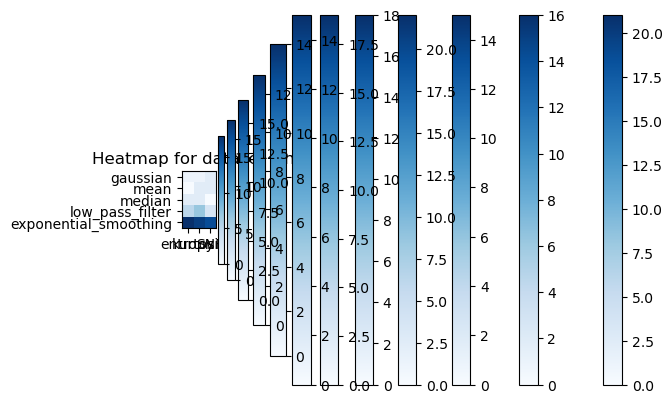

In [9]:
smoothing_functions = ['gaussian', 'mean', 'median', 'low_pass_filter', 'exponential_smoothing']
statistical_measure = ['entropy', 'kurtosis', 'signal to noise ratio']

for dataset in datasets_in_csv:
    # Calculate best 3 methods for each dataset

    methods_to_counts = {}

    for index in range(0, 15):
        dataset_and_index = dataset + ':' + str(index)
        method = dataset_and_index_to_method.get(dataset_and_index, "")
        count = dataset_and_index_to_count.get(dataset_and_index, 0)
        methods_to_counts[method] = count

    sorted_methods = sorted(methods_to_counts, key=methods_to_counts.get, reverse=True)

    print("Best 3 methods for dataset " + dataset + ": " + str(sorted_methods[:3]))

    # Dump dataset and best 3 methods to csv file

    with open('best_methods.csv', 'a') as f:
        f.write(dataset + ',' + sorted_methods[0] + ',' + sorted_methods[1] + ',' + sorted_methods[2] + '\n')

    # Construct a 2D heatmap with smoothing functions on the x-axis and statistical measures on the y-axis
    # The value in each cell is methods_to_counts[smoothing_function + statistical_measure]

    heatmap = np.zeros((len(smoothing_functions), len(statistical_measure)))

    for i, smoothing_function in enumerate(smoothing_functions):
        for j, measure in enumerate(statistical_measure):
            method = smoothing_function + '_' + measure
            count = methods_to_counts.get(method, 0)
            heatmap[i][j] = count
    
    # Plot heatmap with x-axis labels as statistical measures and y-axis labels as smoothing functions
    # Give title to plot as "Heatmap for dataset " + dataset
    # Keep color of heat map as different shades of blue
    # Show legend on the right side of the plot

    plt.pyplot.imshow(heatmap, cmap='Blues')
    new_statistical_measure = [x for x in statistical_measure]
    new_statistical_measure[2] = 'SNR'
    plt.pyplot.xticks(range(len(statistical_measure)), new_statistical_measure)
    plt.pyplot.yticks(range(len(smoothing_functions)), smoothing_functions)
    plt.pyplot.title("Heatmap for dataset " + dataset)
    plt.pyplot.colorbar()
    # plt.pyplot.show()

    # Dump heatmap image to file in folder "heatmaps"

    plt.pyplot.savefig("heatmaps/" + dataset + ".png")

    # Close the plot

    plt.pyplot.close()
    


    # Also create a 3D histogram with smoothing functions on the x-axis, statistical measures on the y-axis, and count on the z-axis
    # Give title to plot as "3D Histogram for dataset " + dataset

    # fig = plt.pyplot.figure()
    # ax = fig.add_subplot(111, projection='3d')
    # x = np.arange(len(smoothing_functions))
    # y = np.arange(len(statistical_measure))
    # x, y = np.meshgrid(x, y)
    # # Transpose heatmap so that x and y axis are correct
    # z = heatmap.T
    # z = heatmap.flatten()
    # ax.bar3d(x.flatten(), y.flatten(), np.zeros(len(z)), 0.5, 0.5, z)

    # # Set x-axis labels as smoothing functions
    # ax.set_xlabel(smoothing_functions)
    # # Set y-axis labels as statistical measures
    # ax.set_ylabel(statistical_measure)

    
    # ax.set_zlabel('Votes')
    # ax.set_title("3D Histogram for dataset " + dataset)

    # plt.pyplot.show()

    # print(methods_to_counts)


In [10]:
print(datasets_in_csv)

['gasoline1', 'climate_jfk_tmax', 'eeg_chan10_2500', 'chi_homicide_weekly', 'monthly_beer_austria', 'climate_lax_awnd', 'gasoline2', 'taxi', 'nz_tourist_monthly', 'temp', 'usa_flights_weekly', 'sine']


In [11]:
dataset_to_category = {
    'gasoline1': 'Linearly IncDec',
    'gasoline2': 'Linearly IncDec',
    'nz_tourist_monthly': 'Linearly IncDec',
    'climate_jfk_tmax': 'seasonal',
    'climate_lax_awnd': 'seasonal',
    'monthly_beer_austria': 'seasonal',
    'sine': 'seasonal',
    'chi_homicide_weekly': 'stationary',
    'climate_sea_precp': 'stationary',
    'eeg_chan10_2500': 'stationary',
    'stock_bac_volume': 'stationary',
    'taxi': 'stationary',
    'temp': 'stationary',
    'usa_flights_weekly': 'stationary',
}


In [12]:
# Collate the counts of all methods in each category
category_to_methods_to_counts = {}

for dataset in datasets_in_csv:
    category = dataset_to_category[dataset]

    if category not in category_to_methods_to_counts:
        category_to_methods_to_counts[category] = {}

    for index in range(0, 15):
        dataset_and_index = dataset + ':' + str(index)
        method = dataset_and_index_to_method.get(dataset_and_index, "")
        count = dataset_and_index_to_count.get(dataset_and_index, 0)
        # Add count to category_to_methods_to_counts
        if method not in category_to_methods_to_counts[category]:
            category_to_methods_to_counts[category][method] = count
        else:
            category_to_methods_to_counts[category][method] += count

# Print the counts of all methods in each category in reverse sorted order
for category in category_to_methods_to_counts:
    print("Category: " + category)
    methods_to_counts = category_to_methods_to_counts[category]
    sorted_methods = sorted(methods_to_counts, key=methods_to_counts.get, reverse=True)
    for method in sorted_methods:
        print(method + ": " + str(methods_to_counts[method]))

Category: Linearly IncDec
gaussian_kurtosis: 36
mean_entropy: 30
gaussian_entropy: 25
exponential_smoothing_kurtosis: 25
exponential_smoothing_entropy: 24
exponential_smoothing_signal to noise ratio: 22
median_entropy: 17
low_pass_filter_entropy: 13
low_pass_filter_kurtosis: 10
mean_kurtosis: 9
mean_signal to noise ratio: 6
median_kurtosis: 5
gaussian_signal to noise ratio: 4
low_pass_filter_signal to noise ratio: 4
median_signal to noise ratio: 1
Category: seasonal
exponential_smoothing_kurtosis: 53
exponential_smoothing_entropy: 46
gaussian_kurtosis: 42
exponential_smoothing_signal to noise ratio: 37
low_pass_filter_kurtosis: 35
mean_kurtosis: 22
low_pass_filter_signal to noise ratio: 17
gaussian_entropy: 11
low_pass_filter_entropy: 11
median_kurtosis: 8
median_entropy: 7
mean_entropy: 7
mean_signal to noise ratio: 6
gaussian_signal to noise ratio: 4
median_signal to noise ratio: 0
Category: stationary
low_pass_filter_kurtosis: 57
gaussian_entropy: 52
low_pass_filter_entropy: 47
gaus

In [13]:
# Print counts for climate_jfk_tmax
print('eeg_chan10_2500')
for index in range(0, 15):
    dataset_and_index = "eeg_chan10_2500" + ':' + str(index)
    method = dataset_and_index_to_method.get(dataset_and_index, "")
    count = dataset_and_index_to_count.get(dataset_and_index, 0)
    print(method + ": " + str(count))

eeg_chan10_2500
low_pass_filter_entropy: 12
mean_signal to noise ratio: 0
mean_kurtosis: 2
median_kurtosis: 2
exponential_smoothing_entropy: 7
median_signal to noise ratio: 0
gaussian_kurtosis: 2
gaussian_signal to noise ratio: 1
mean_entropy: 15
exponential_smoothing_kurtosis: 11
low_pass_filter_kurtosis: 10
low_pass_filter_signal to noise ratio: 2
exponential_smoothing_signal to noise ratio: 0
median_entropy: 2
gaussian_entropy: 12


In [14]:
# For a smoothing function, print its count in all datasets
for smoothing_function in smoothing_functions:
    print("Smoothing function: " + smoothing_function)
    for dataset in datasets_in_csv:
        for index in range(0, 15):
            dataset_and_index = dataset + ':' + str(index)
            method = dataset_and_index_to_method.get(dataset_and_index, "")
            if method.startswith(smoothing_function):
                print("Dataset: " + str(dataset) + ", " + str(dataset_and_index_to_count.get(dataset_and_index, 0)))

Smoothing function: gaussian
Dataset: gasoline1, 21
Dataset: gasoline1, 12
Dataset: gasoline1, 2
Dataset: climate_jfk_tmax, 4
Dataset: climate_jfk_tmax, 0
Dataset: climate_jfk_tmax, 16
Dataset: eeg_chan10_2500, 2
Dataset: eeg_chan10_2500, 1
Dataset: eeg_chan10_2500, 12
Dataset: chi_homicide_weekly, 1
Dataset: chi_homicide_weekly, 3
Dataset: chi_homicide_weekly, 12
Dataset: monthly_beer_austria, 1
Dataset: monthly_beer_austria, 6
Dataset: monthly_beer_austria, 8
Dataset: climate_lax_awnd, 17
Dataset: climate_lax_awnd, 0
Dataset: climate_lax_awnd, 1
Dataset: gasoline2, 1
Dataset: gasoline2, 2
Dataset: gasoline2, 8
Dataset: taxi, 8
Dataset: taxi, 7
Dataset: taxi, 2
Dataset: nz_tourist_monthly, 7
Dataset: nz_tourist_monthly, 11
Dataset: nz_tourist_monthly, 1
Dataset: temp, 16
Dataset: temp, 8
Dataset: temp, 15
Dataset: usa_flights_weekly, 6
Dataset: usa_flights_weekly, 14
Dataset: usa_flights_weekly, 4
Dataset: sine, 2
Dataset: sine, 1
Dataset: sine, 1
Smoothing function: mean
Dataset: gas

In [15]:
# For a statistical measure, print its count in all datasets
for statistical_measure in statistical_measure:
    print("Statistical measure: " + statistical_measure)
    for dataset in datasets_in_csv:
        for index in range(0, 15):
            dataset_and_index = dataset + ':' + str(index)
            method = dataset_and_index_to_method.get(dataset_and_index, "")
            if method.endswith(statistical_measure):
                print("Dataset: " + str(dataset) + ", " + str(dataset_and_index_to_count.get(dataset_and_index, 0)))

Statistical measure: entropy
Dataset: gasoline1, 3
Dataset: gasoline1, 3
Dataset: gasoline1, 15
Dataset: gasoline1, 12
Dataset: gasoline1, 8
Dataset: climate_jfk_tmax, 4
Dataset: climate_jfk_tmax, 6
Dataset: climate_jfk_tmax, 13
Dataset: climate_jfk_tmax, 1
Dataset: climate_jfk_tmax, 3
Dataset: eeg_chan10_2500, 12
Dataset: eeg_chan10_2500, 7
Dataset: eeg_chan10_2500, 15
Dataset: eeg_chan10_2500, 2
Dataset: eeg_chan10_2500, 12
Dataset: chi_homicide_weekly, 0
Dataset: chi_homicide_weekly, 3
Dataset: chi_homicide_weekly, 9
Dataset: chi_homicide_weekly, 0
Dataset: chi_homicide_weekly, 2
Dataset: monthly_beer_austria, 10
Dataset: monthly_beer_austria, 4
Dataset: monthly_beer_austria, 6
Dataset: monthly_beer_austria, 4
Dataset: monthly_beer_austria, 0
Dataset: climate_lax_awnd, 0
Dataset: climate_lax_awnd, 5
Dataset: climate_lax_awnd, 0
Dataset: climate_lax_awnd, 0
Dataset: climate_lax_awnd, 0
Dataset: gasoline2, 2
Dataset: gasoline2, 8
Dataset: gasoline2, 2
Dataset: gasoline2, 14
Dataset: g